# Pengujian Terhadap Width

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.dont_write_bytecode = True
sys.dont_write_bytecode = True
sys.path.append('..')

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
input_size = 784
hidden_layers = 3
hidden_size = 128
output_size = 10
param_1 = 0
param_2 = 0.5
batch_size = 64

In [13]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

## 1. Width = 64 | Depth = 3

In [14]:
ann1 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=64,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=64,
            num_neurons=64,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=64,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

Training: 100%|██████████| 500/500 [12:17<00:00,  1.47s/it, Loss: 0.0033, Val Loss: 0.5033]

Total training time: 691.83s


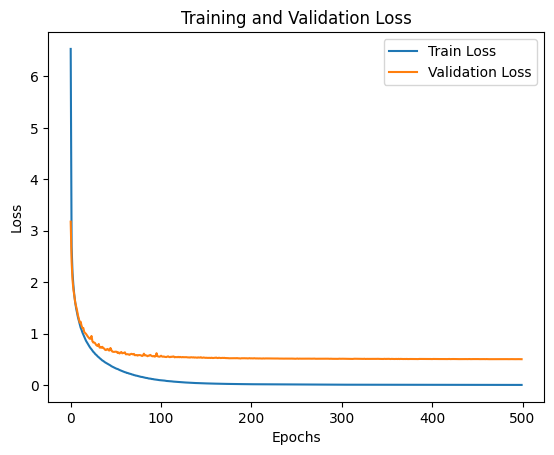

In [15]:
loss1 = ann1.train(
    x=X_train,
    y=y_train,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=0.01,
    epochs=500,
    batch_size=batch_size,
    verbose=True,
    validation_data=(X_test, y_test),
)

epoch_losses1, val_losses1 = loss1

plt.plot(epoch_losses1, label='Train Loss')
plt.plot(val_losses1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import f1_score

y_pred1 = ann1.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred1, average='macro')}")

F1 Score: 0.9698560420453983


## 2. Width = 128 | Depth = 3

In [17]:
ann2 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

Training: 100%|██████████| 500/500 [3:06:48<00:00, 22.42s/it, Loss: 0.0028, Val Loss: 0.4314]      


Total training time: 11058.01s


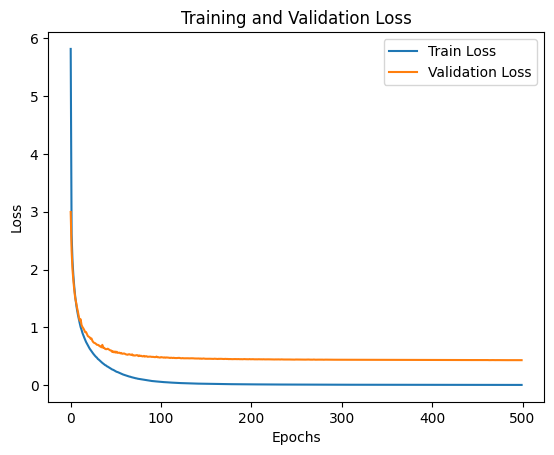

In [18]:
loss2 = ann2.train(
    x=X_train,
    y=y_train,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=0.01,
    epochs=500,
    batch_size=batch_size,
    verbose=True,
    validation_data=(X_test, y_test),
)

epoch_losses2, val_losses2 = loss2

plt.plot(epoch_losses2, label='Train Loss')
plt.plot(val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import f1_score

y_pred2 = ann2.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred2, average='macro')}")

F1 Score: 0.9743308237271447


## 3. Width = 256 | Depth = 3

In [20]:
ann3 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=256,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=256,
            num_neurons=256,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=256,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

Training: 100%|██████████| 500/500 [2:03:03<00:00, 14.77s/it, Loss: 0.0024, Val Loss: 0.4191]    


Total training time: 7116.64s


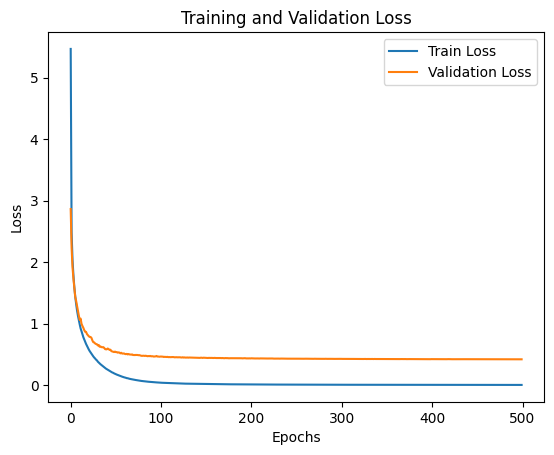

In [21]:
loss3 = ann3.train(
    x=X_train,
    y=y_train,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=0.01,
    epochs=500,
    batch_size=batch_size,
    verbose=True,
    validation_data=(X_test, y_test),
)

epoch_losses3, val_losses3 = loss3

plt.plot(epoch_losses3, label='Train Loss')
plt.plot(val_losses3, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import f1_score

y_pred3 = ann3.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred3, average='macro')}")

F1 Score: 0.9754137606912996
